# European Central Bank API

In [9]:
import requests
import pandas as pd 
from pandas import json_normalize 
import matplotlib.pyplot as plt 

url= 'https://api.frankfurter.app/2013-01-01..2023-12-31'
response= requests.get(url)
data=response.json()

df=pd.DataFrame(data)

#normalize the rates column
df_rates=json_normalize(df['rates'])

#reset the index
df=df.reset_index()

#drop rates column 
df=df.drop('rates', axis=1)

df=pd.concat([df,df_rates], axis=1)

df


,index,amount,base,start_date,end_date,AUD,BGN,BRL,CAD,CHF,...,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR,ISK
0,2012-12-31,1.0,EUR,2012-12-31,2023-12-25,1.2534,1.9558,2.6831,1.2960,1.20910,...,4.0925,4.4281,39.796,8.5471,1.6072,39.909,2.3412,1.3125,11.2497,NaN
1,2013-01-07,1.0,EUR,2012-12-31,2023-12-25,1.2454,1.9558,2.6658,1.2930,1.21060,...,4.1083,4.3994,39.793,8.5756,1.6094,39.818,2.3299,1.3114,11.3051,NaN
2,2013-01-14,1.0,EUR,2012-12-31,2023-12-25,1.2649,1.9558,2.7182,1.3157,1.23720,...,4.1274,4.3564,40.374,8.6386,1.6330,39.884,2.3541,1.3327,11.7232,NaN
3,2013-01-21,1.0,EUR,2012-12-31,2023-12-25,1.2713,1.9558,2.7238,1.3324,1.24100,...,4.1750,4.3650,40.287,8.6904,1.6409,39.804,2.3626,1.3358,11.9565,NaN
4,2013-01-28,1.0,EUR,2012-12-31,2023-12-25,1.2985,1.9558,2.7009,1.3572,1.23950,...,4.1961,4.3848,40.662,8.6231,1.6743,40.348,2.3862,1.3522,12.1687,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2023-11-27,1.0,EUR,2012-12-31,2023-12-25,1.6544,1.9558,5.3684,1.4868,0.96010,...,4.3468,4.9718,NaN,11.4044,1.4611,38.312,31.6180,1.0938,20.4270,150.70
570,2023-12-04,1.0,EUR,2012-12-31,2023-12-25,1.6394,1.9558,5.3070,1.4663,0.94490,...,4.3330,4.9675,NaN,11.2861,1.4463,38.017,31.2560,1.0802,20.3690,150.42
571,2023-12-11,1.0,EUR,2012-12-31,2023-12-25,1.6376,1.9558,5.3508,1.4648,0.94702,...,4.3234,4.9720,NaN,11.2496,1.4502,38.364,31.4730,1.0843,20.3620,150.66
572,2023-12-18,1.0,EUR,2012-12-31,2023-12-25,1.6225,1.9558,5.3582,1.4635,0.94518,...,4.3412,4.9702,NaN,11.1207,1.4576,38.229,31.9460,1.0966,20.2090,150.54


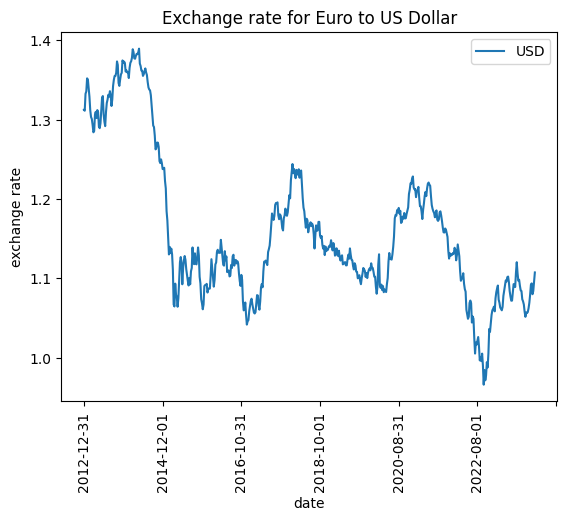

In [40]:
### How is the exchange rate of the Euro (EUR) against the US dollar (USD) changed over time?
usd=df[['index','USD']].set_index('index').sort_index(ascending=True).plot(title='Exchange rate for Euro to US Dollar',ylabel='exchange rate', rot=90, xlabel='date')



<Axes: title={'center': 'Distribution of CNY exchange rate'}, xlabel='CNY exchange rate', ylabel='Frequency'>

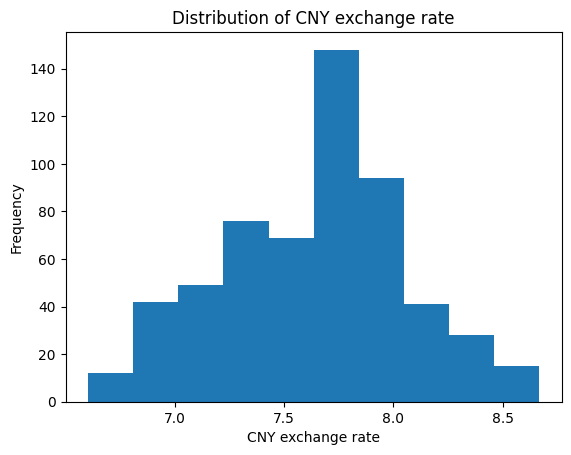

In [15]:
# What is the distribution of exchange rates for the chines yuan CNY against the EUR
df['CNY'].plot.hist(xlabel='CNY exchange rate', title='Distribution of CNY exchange rate')

C:\Users\user\AppData\Local\Temp\ipykernel_8372\2365247221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp['index']=pd.to_datetime(gbp['index'])
C:\Users\user\AppData\Local\Temp\ipykernel_8372\2365247221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbp['index']=gbp['index'].dt.strftime('%Y')


<Axes: title={'center': 'Great British Pound (GBP) vs Japanese Yen'}, xlabel='Year', ylabel='currency exchange rate'>

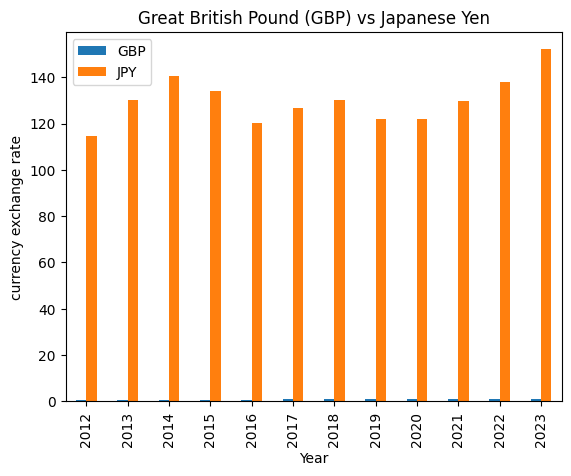

In [28]:
# Between Great british pound (GBP) and the japanexe yen (JPY) determine which country's currency is more volatile 


gbp=df[['index','GBP', 'JPY']]
gbp['index']=pd.to_datetime(gbp['index'])
gbp['index']=gbp['index'].dt.strftime('%Y')
gbp.groupby('index')[['GBP','JPY']].mean().plot.bar(ylabel='currency exchange rate', title='Great British Pound (GBP) vs Japanese Yen', xlabel='Year')



<Axes: title={'center': 'Canadian Dollar vs US Dollar'}, xlabel='Canadian Dollar', ylabel='US Dollar'>

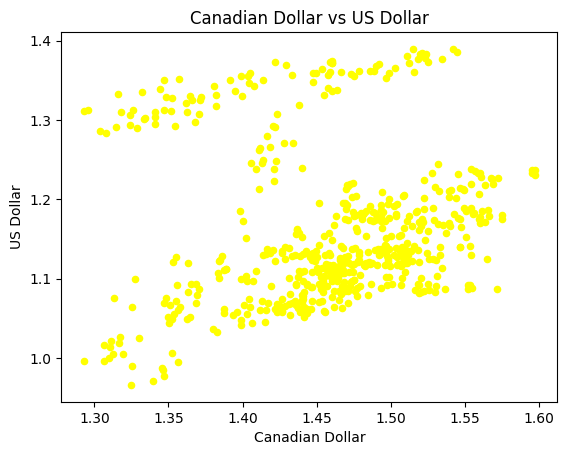

In [30]:
# Is there a correlation between the exchange rates of the canadian Dollar  and  the american dollar (USD)
df[['CAD','USD']].plot.scatter(x='CAD', y='USD', xlabel='Canadian Dollar', ylabel='US Dollar', title='Canadian Dollar vs US Dollar', c='yellow')